In [ ]:
import pandas as pd
import numpy as np
import string
import inflect
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [ ]:
# Read the CSV file
data = pd.read_csv("IMDB Dataset.csv")

In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
# Convert the reviews to lowercase
data["review"] = data['review'].str.lower()

In [ ]:
# Remove <br /> and punctuation
table = str.maketrans('', '', string.punctuation)
for i in range(len(data['review'])):
    data["review"][i] = data["review"][i].replace("<br />","").translate(table)

In [ ]:
# Convert numbers into words
p = inflect.engine()
for i in range(len(data['review'])):
    data["review"][i] = ' '.join([str(p.number_to_words(x)) if str(x).isnumeric() else str(x) for x in data["review"][i].split()])

In [ ]:
# Remove stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

data["review"] = data["review"].apply(remove_stopwords)

In [ ]:
# Encode sentiment labels
encodeedd = {"sentiment": {"positive": 1, "negative": 0}}
data.replace(encodeedd, inplace=True)

In [ ]:
# TF-IDF vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=2000, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(data.review).toarray()
labels = data.sentiment

In [ ]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

In [ ]:
# Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_pred, normalize=True)
print("Test accuracy:", test_accuracy)

Test accuracy: 0.8044


In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[5869, 1542],
       [1392, 6197]])

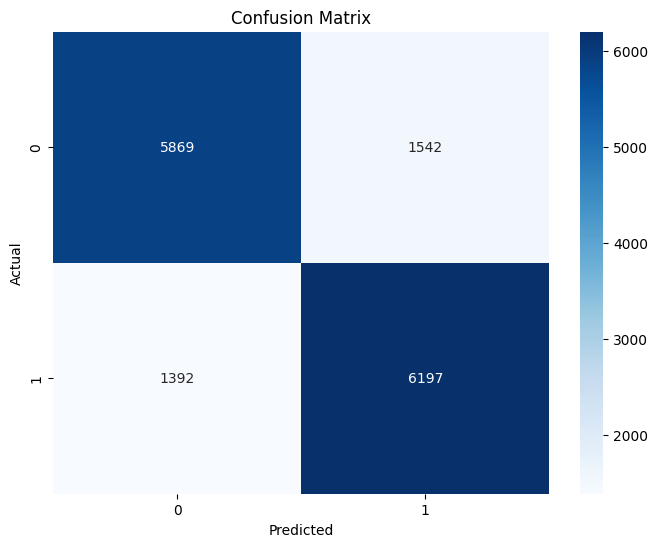

In [ ]:
# Visualize the confusion matrix
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()